<a href="https://colab.research.google.com/github/TMJukebox/All-Time-Classics/blob/master/CS3793_5233_assignment1_abc123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793/5233: Assignment-1

**Rojas - Aden - (syz058)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [1]:
# Add only your imports here

import pandas as pd
import matplotlib.pyplot as plt
from queue import PriorityQueue
import geopy.distance
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data"


In [3]:
# Load the graph data from the files# Load the graph data from the files
#read in the data files from the basePath folder
cities = pd.read_csv(basePath + "/cities.csv", header=None, names=['City', 'Latitude', 'Longitude'])
distances = pd.read_csv(basePath + "/distances.csv", header=None, names=['City1', 'City2', 'Distance'])

#test to see if the data was read in correctly
print(cities)
print(distances)

               City  Latitude  Longitude
0           Abilene   32.4543   -99.7384
1             Alice   27.7556   -98.0653
2          Amarillo   35.1989  -101.8310
3            Austin   30.3006   -97.7517
4          Beaumont   30.0850   -94.1451
5       Brownsville   25.9980   -97.4565
6   College Station   30.5852   -96.2960
7          Columbus   29.7055   -96.5563
8    Corpus Christi   27.7261   -97.3755
9           Dalhart   36.0579  -102.5123
10           Dallas   32.7936   -96.7662
11          Del Rio   29.3708  -100.8800
12          El Paso   31.8479  -106.4309
13       Fort Worth   32.7812   -97.3472
14        Galveston   29.5112   -95.1979
15         Gonzalez   29.5126   -97.4472
16          Houston   29.7869   -95.3905
17    Jamaica Beach   29.1905   -94.9801
18           Kenedy   28.8176   -97.8518
19           Laredo   27.5617   -99.4874
20          Lubbock   33.5642  -101.8871
21          McAllen   26.2273   -98.2471
22          Midland   32.0249  -102.1137
23    New Braunf

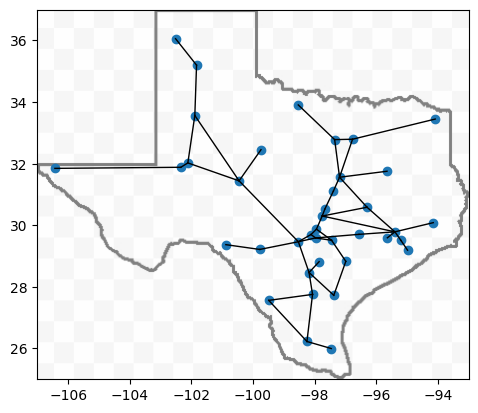

In [13]:
# Display a 2D graph of the given data.
graph = plt.scatter(cities['Longitude'], cities['Latitude'], marker='o')
graph

img = Image.open(basePath + '/texas-map.png')
plt.imshow(img, extent=[-107, -93, 25, 37], alpha=0.5)
for index, row in distances.iterrows():
    city1 = cities.loc[cities['City'] == row['City1']]
    city2 = cities.loc[cities['City'] == row['City2']]
    plt.plot([city1['Longitude'], city2['Longitude']], [city1['Latitude'], city2['Latitude']], color='k', linestyle='-', linewidth=1)

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [15]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'

start_city = 'Three Rivers'
# Initialize the visited cities set and the queue
visited = set([start_city])
queue = PriorityQueue()
queue.put(start_city)

path = {start_city: [start_city]} #path taken

# Perform BFS
while not queue.empty():
    current_city = queue.get()

    # Find the neighboring cities
    neighbors = distances[(distances['City1'] == current_city) | (distances['City2'] == current_city)]

    for _, neighbor in neighbors.iterrows():
        if neighbor['City1'] == current_city:
            next_city = neighbor['City2']
        else:
            next_city = neighbor['City1']

        distance = neighbor['Distance'] # Calculate the distance between current city and next city

        if next_city not in visited:
            visited.add(next_city)
            queue.put(next_city)
            path[next_city] = path[current_city] + [next_city]

# Print the paths taken from the start city to each visited city
for city in visited:
    print(f'Path to {city}: {path[city]}, distance: {len(path[city]) - 1} jump(s)')

Path to Beaumont: ['Three Rivers', 'San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'Houston', 'Beaumont'], distance: 6 jump(s)
Path to El Paso: ['Three Rivers', 'San Antonio', 'San Angelo', 'Midland', 'Odessa', 'El Paso'], distance: 5 jump(s)
Path to Brownsville: ['Three Rivers', 'Alice', 'McAllen', 'Brownsville'], distance: 3 jump(s)
Path to San Marcos: ['Three Rivers', 'San Antonio', 'New Braunfels', 'San Marcos'], distance: 3 jump(s)
Path to Columbus: ['Three Rivers', 'San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'Houston', 'Columbus'], distance: 6 jump(s)
Path to Midland: ['Three Rivers', 'San Antonio', 'San Angelo', 'Midland'], distance: 3 jump(s)
Path to Corpus Christi: ['Three Rivers', 'Corpus Christi'], distance: 1 jump(s)
Path to Laredo: ['Three Rivers', 'Alice', 'Laredo'], distance: 2 jump(s)
Path to Victoria: ['Three Rivers', 'Corpus Christi', 'Victoria'], distance: 2 jump(s)
Path to College Station: ['Three Rivers', 'San Antonio', 'New Braunfels', 'San Mar

#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



